# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, You'll practice your knowledge on correlation, autocorrelation and the ACF and PACF.

## Objectives

You will be able to:
- Understand correlation in Time Series
- Plot and discuss the autocorrelation function (ACF) for a time-series 
- Plot and discuss the partial autocorrelation function (PACF) for a time-series 
- Interpret ACF and PACF and Identify use cases both functions

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. First, import the necessary libraries for time series and plotting. Then import the data (in `exch_rates.csv`) and make sure it's set in the correct time series format with the `datetime` as the index.

In [4]:
# your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('exch_rates.csv', parse_dates=True, index_col='Frequency')
df.head()

,Euro,Australian Dollar,Danish Krone
Frequency,,,
2000-01-01,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN
2000-01-03,0.991080,1.520912,7.374034
2000-01-04,0.970403,1.521300,7.222610
2000-01-05,0.964506,1.521316,7.180170


In [5]:
# your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6905 entries, 2000-01-01 to 2018-11-26
Data columns (total 3 columns):
Euro                 4838 non-null float64
Australian Dollar    4838 non-null float64
Danish Krone         4838 non-null float64
dtypes: float64(3)
memory usage: 215.8 KB


Plot the three exchange rates in one plot

Text(0, 0.5, 'Exchange Rate ($)')

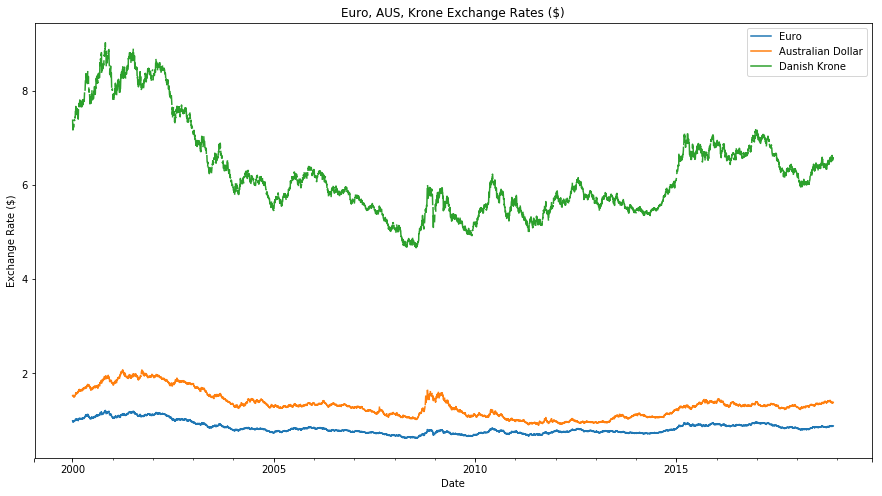

In [6]:
# your code here
df.plot(figsize=(15, 8))
plt.title('Euro, AUS, Krone Exchange Rates ($)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate ($)')

You can see that the EUR/USD and AUD/USD exchange rate are somewhere between rougly 0.5 and 2 between 2000 and 2018, where the Danish Krone is somewhere between roughly 4.5 and 9. Now let's look at the correlations between these time series.

In [7]:
# your code here
df.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.

Next, look at the plots of the differenced series. Use subplots to plot them rather than creating just one plot.

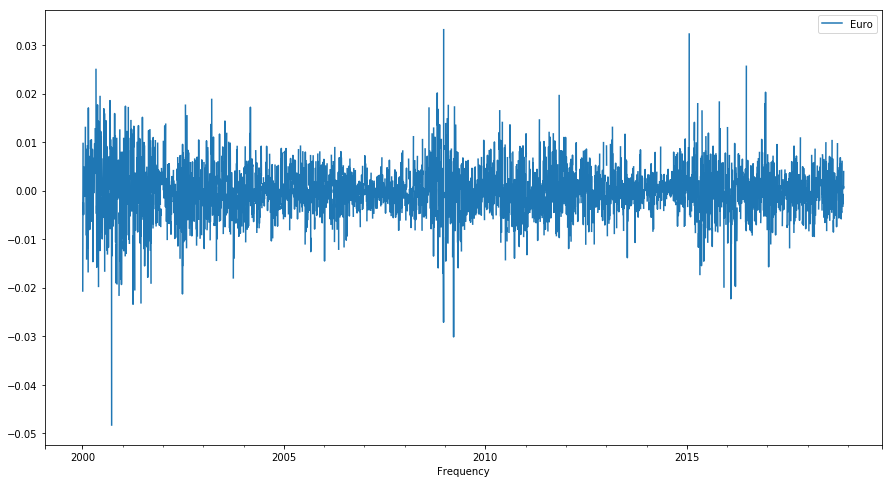

In [10]:
# your code here
df['Euro'].diff(1).plot(figsize=(15, 8))
plt.legend()

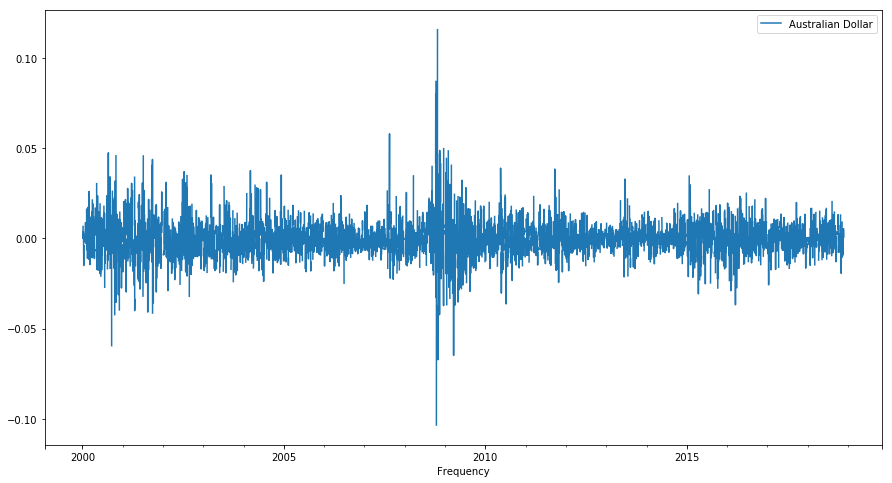

In [12]:
# your code here
df['Australian Dollar'].diff(1).plot(figsize=(15, 8))
plt.legend()

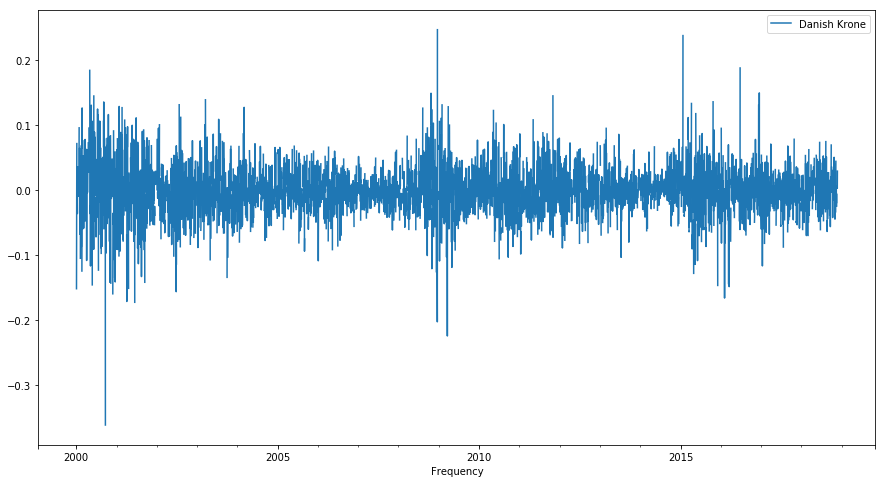

In [13]:
# your code here
df['Danish Krone'].diff(1).plot(figsize=(15, 8))
plt.legend()

### Explain what's going on
Variance in all three plots seems to increase heavily in 2008, right around the time of the financial crisis. Therefore, even after differencing these plots are non-stationary.

Next, let's look at the "lag 1 autocorrelation" for the EUR/USD exchange rate. Create a "lag 1 autocorrelation" series, plot the result, and look at the correlation coefficient.

In [15]:
# your code here
eur_shift_1 = df['Euro'].shift(1)
eur_shift_1.head()

Frequency
2000-01-01         NaN
2000-01-02         NaN
2000-01-03         NaN
2000-01-04    0.991080
2000-01-05    0.970403
Name: Euro, dtype: float64

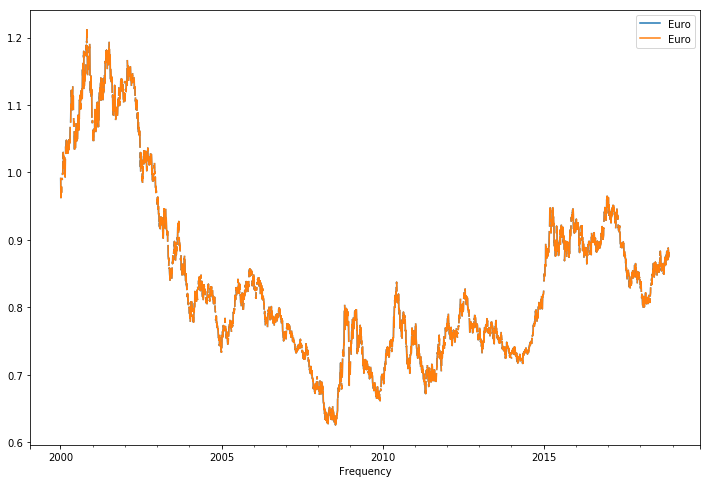

In [16]:
# your code here
eur_lag_1 = pd.concat([df['Euro'], eur_shift_1], axis=1)
eur_lag_1.plot(figsize=(12, 8))

In [17]:
# your code here
eur_lag_1.corr()

,Euro,Euro
Euro,1.000000,0.999146
Euro,0.999146,1.000000


Repeat this, but for a "lag 5 autocorrelation"

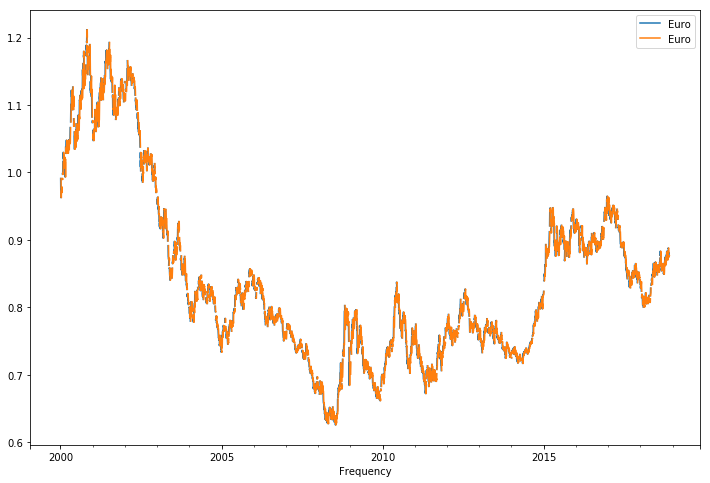

In [18]:
# your code here
eur_shift_5 = df['Euro'].shift(5)
eur_lag_5 = pd.concat([df['Euro'], eur_shift_5], axis=1)
eur_lag_5.plot(figsize=(12, 8))

In [19]:
# your code here
eur_lag_5.corr()

,Euro,Euro
Euro,1.000000,0.997518
Euro,0.997518,1.000000


### What's your conclusion here?
The EUR/USD exchange rate has high autocorrelation for lags 1 and 5.

Knowing this, let's plot the ACF now.

In [23]:
df['Euro']

Frequency
2000-01-01         NaN
2000-01-02         NaN
2000-01-03    0.991080
2000-01-04    0.970403
2000-01-05    0.964506
2000-01-06    0.962649
2000-01-07    0.972384
2000-01-08         NaN
2000-01-09         NaN
2000-01-10    0.977613
2000-01-11    0.975039
2000-01-12    0.970120
2000-01-13    0.973141
2000-01-14    0.977995
2000-01-15         NaN
2000-01-16         NaN
2000-01-17    0.990688
2000-01-18    0.990786
2000-01-19    0.989609
2000-01-20    0.991179
2000-01-21    0.990393
2000-01-22         NaN
2000-01-23         NaN
2000-01-24    0.997307
2000-01-25    0.999201
2000-01-26    0.998104
2000-01-27    1.002406
2000-01-28    1.015435
2000-01-29         NaN
2000-01-30         NaN
                ...   
2018-10-28         NaN
2018-10-29    0.878657
2018-10-30    0.879353
2018-10-31    0.883548
2018-11-01    0.877732
2018-11-02    0.875887
2018-11-03         NaN
2018-11-04         NaN
2018-11-05    0.879507
2018-11-06    0.875044
2018-11-07    0.870549
2018-11-08    0.875350
2

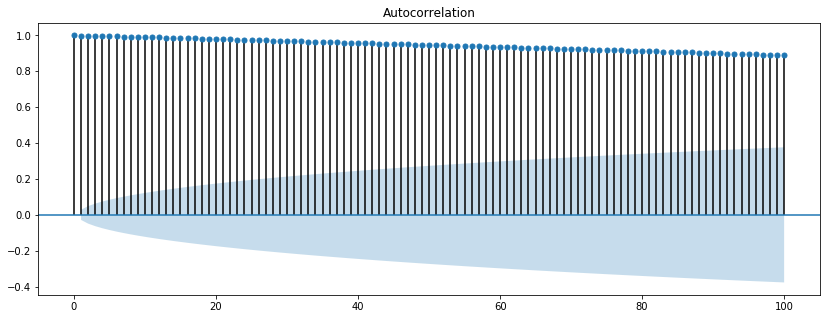

In [30]:
# your code here
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_acf(df['Euro'].dropna(), lags=100);

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the Partial Autocorrelation Function.

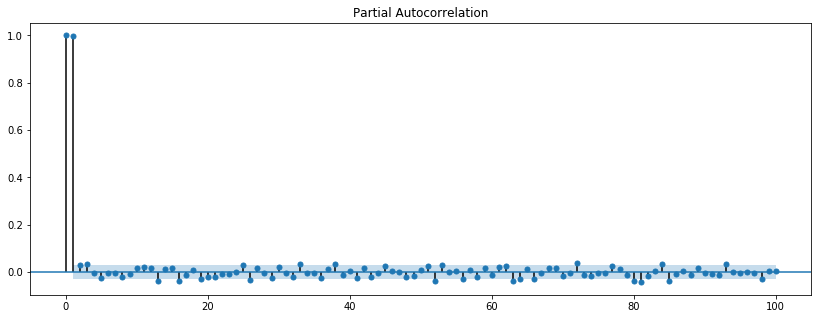

In [29]:
# your code here
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(df.Euro.dropna(), lags=100);

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period lags, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for Random Walk series!

## The Airpassenger Data

Look at ACF and PACF for the airpassenger data and describe the result `passengers.csv`. Do this both for the differenced and regular series.

In [32]:
# your code here
pass_df = pd.read_csv('passengers.csv', index_col='Month', parse_dates=True)
pass_df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


C:\Users\caputr\anaconda3\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


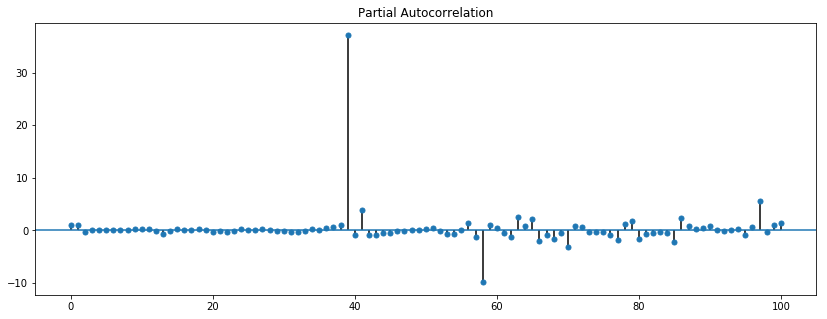

In [37]:
# your code here
rcParams['figure.figsize'] = 14, 5
plot_pacf(pass_df['#Passengers'].dropna(), lags=100);

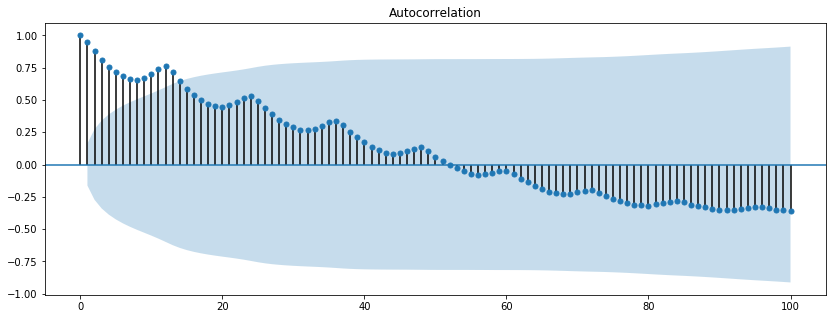

In [38]:
# your code here
# your code here
rcParams['figure.figsize'] = 14, 5
plot_acf(pass_df['#Passengers'].dropna(), lags=100);

In [39]:
# your code here
pass_diff = pass_df.diff(1)

C:\Users\caputr\anaconda3\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


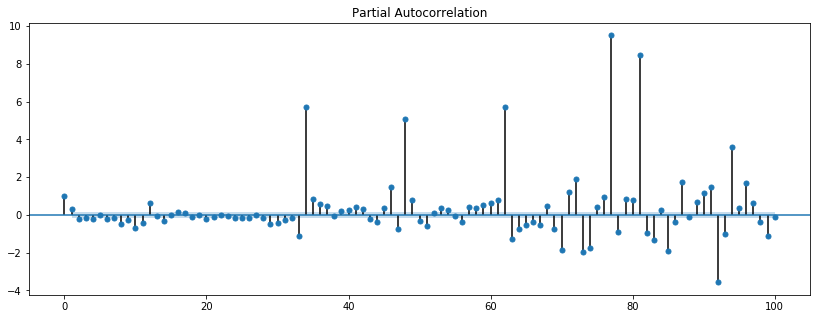

In [41]:
# your code here
rcParams['figure.figsize'] = 14, 5
plot_pacf(pass_diff['#Passengers'].dropna(), lags=100);

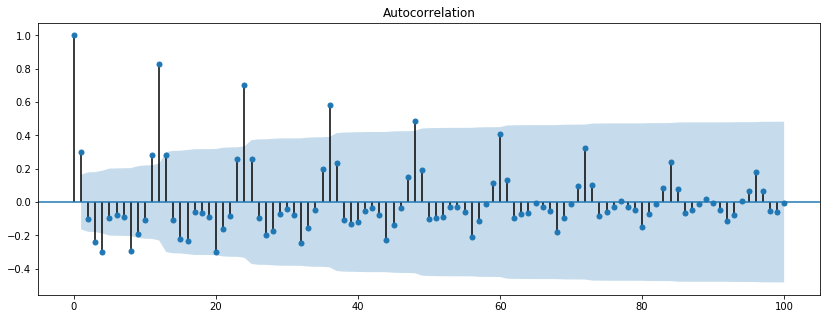

In [42]:
# your code here
rcParams['figure.figsize'] = 14, 5
plot_acf(pass_diff['#Passengers'].dropna(), lags=100);

### Your conclusion here
There seems to be seasonality in the differenced and non-differenced acf. Pacf is throwing an error and looks a little strange.

## The NYSE data

Look at correlation and autocorrelation functions for the NYSE data ("NYSE_monthly.csv")

In [45]:
# your code here
nyse = pd.read_csv('NYSE_monthly.csv', parse_dates=True, index_col='Month')
nyse.head()

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042


C:\Users\caputr\anaconda3\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\caputr\anaconda3\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1275: RuntimeWarning: invalid value encountered in double_scalars
  r[k] = (X[0:-k] * X[k:]).sum() / denom(k)


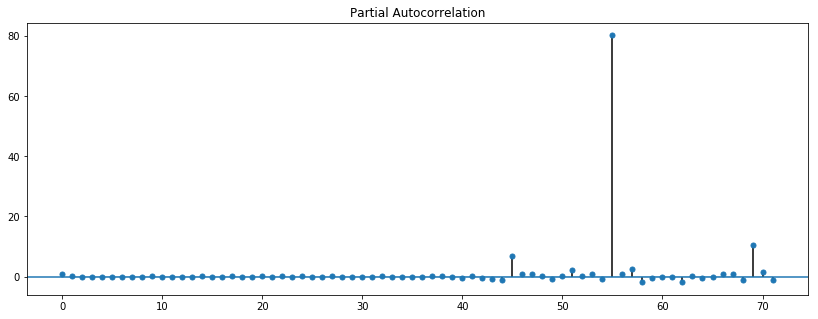

In [46]:
# your code here
rcParams['figure.figsize'] = 14, 5
plot_pacf(nyse.monthly_return.dropna(), lags=100);

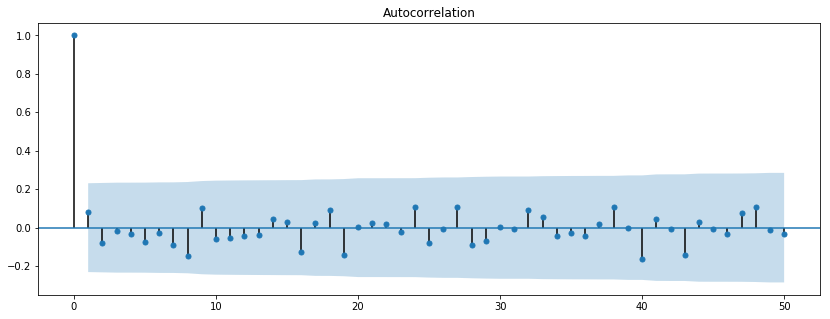

In [48]:
# your code here
rcParams['figure.figsize'] = 14, 5
plot_acf(nyse.monthly_return.dropna(), lags=50);

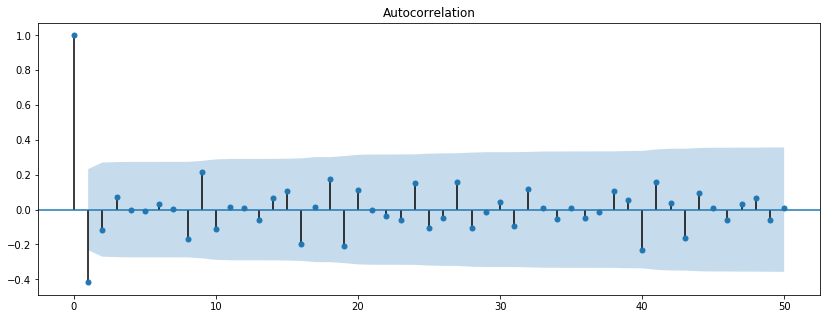

In [49]:
# your code here
rcParams['figure.figsize'] = 14, 5
plot_acf(nyse.diff(1).monthly_return.dropna(), lags=50);

Seems like this time series has low autocorrelation. This makes sense since returns are already a differenced series. 



## Summary

Great, you've now been introduced to correlation, the ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!